# Teoria dos Grafos

Implemente uma rotina que imprima os vértices do caminho mais curto entre o vértice inicial e outro vértice qualquer do grafo. 

Dependências:

In [1]:
# !pip install python-igraph
# !pip install pycairo

Importações:

In [2]:
import igraph as ig
from igraph import plot

#### Função para calcular menor caminho

In [3]:
def shortest_path(graph, start, end): 
    paths_traveled = [] 
      
    # Fila para atravessar o grafo
    cross_graph = [[start]] 
      
    # Caso o começo e o final seja o mesmo nó
    if start == end: 
        return [start]
      
    # Loop para percorrer o grafo
    while len(cross_graph): 
        # Atribui a path o primeiro elemento da fila
        path = cross_graph.pop(0) 
        # Atribui a node o último elemento de path
        node = path[-1] 
          
        # Evitar ciclos verificando se o nó já foi visitado
        if node not in paths_traveled: 
            neighbours = graph[node] 
              
            # Loop para iterar sobre os vizinhos do nó
            for neighbour in neighbours: 
                new_path = path.copy()
                new_path.append(neighbour) 
                cross_graph.append(new_path) 
                  
                # Verificar se o nó vizinho é o último vértice do caminho
                if neighbour == end: 
                    return new_path
                
            paths_traveled.append(node) 
            
    return None

#### Função para colorir caminho

In [4]:
def path_coloring(c1, c2, result, graph_index):
    colors = [c1] * len(graph_index)
    if result != None:
        for x in result:
            if x in graph_index:
                colors[graph_index.index(x)] = c2
    return colors

#### Função para plotagem do grafo

In [5]:
def graph_plot(graph, shortest, x_box, y_box, color1, color2, layout_type):   
    # Instância Graph
    G = ig.Graph()

    # Separando chaves do dicionário
    graph_keys = list(graph.keys())

    # Adicionando n vértices no grafo
    G.add_vertices(len(graph_keys))

    # Encontrando índices das arestas e as adicionando no grafo
    graph_edges = []

    for i, key in enumerate(graph_keys):
        for j in graph[key]:
            if not (graph_keys.index(j), i) in graph_edges:
                graph_edges.append((i, graph_keys.index(j)))

    G.add_edges(graph_edges)

    # Plotagem do grafo
    box = (x_box, y_box)
    layout = G.layout(layout_type) # circle, drl, fr, kk, large, random, rt, rt_circular
    colors = path_coloring(color1, color2, shortest, graph_keys)
    return plot(G, layout=layout, bbox = box, vertex_label=graph_keys, vertex_color=colors)

#### Exemplos de grafos

![title](Graph_ex.png)

![title](Graph_ex_2.png)

#### Lista de adjacência

In [6]:
graph = {'A': ['B', 'C', 'F'],
                 'B': ['A', 'C'],
                 'C': ['A', 'B', 'D'],
                 'D': ['C'],
                 'E': [],
                 'F': ['A']}

In [7]:
graph2 = {'A': ['B', 'C'],
          'B': ['A', 'C', 'D'],
          'C': ['A', 'B', 'D'],
          'D': ['B', 'C', 'F', 'G'],
          'E': ['F'],
          'F': ['D', 'E', 'H'],
          'G': ['D', 'H', 'I'],
          'H': ['F', 'G', 'I'],
          'I': ['G', 'H']}

#### Execução

In [8]:
start = 'A'
end = 'D'

start2 = 'C'
end2 = 'I'

shortest = shortest_path(graph, start, end)
shortest2 = shortest_path(graph2, start2, end2)

#### Resultado

In [9]:
if shortest:
    print(" - Menor caminho grafo 1: ", shortest)
else:
    print(" - Sem resultado, não há encontro dos vértices.")

 - Menor caminho grafo 1:  ['A', 'C', 'D']


In [10]:
if shortest2:
    print(" - Menor caminho grafo 2: ", shortest2)
else:
    print(" - Sem resultado, não há encontro dos vértices.")

 - Menor caminho grafo 2:  ['C', 'D', 'G', 'I']


#### Plotagem

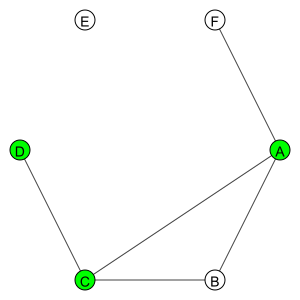

In [11]:
graph_plot(graph, shortest, 300, 300, 'white', 'green', 'circle')

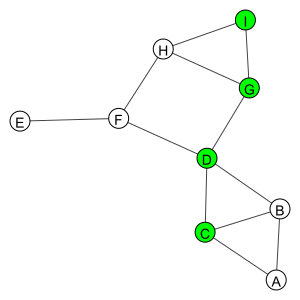

In [12]:
graph_plot(graph2, shortest2, 300, 300, 'white', 'green', 'kk')